#  Decision Trees/ Information Gain/ Entropy

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

from math import log, e

%matplotlib inline

In [18]:
def check_missing_data(dataset):  
    print('Qtd rows X columns:{}'.format(dataset.shape))
    print('\nAre there any Missing values?:{}'.format(dataset.isnull().values.any()))
    print('\nTotal of missing ROWS values: {}'.format(dataset.shape[0] - dataset.dropna().shape[0]))    
    print('\nHas duplicated values?\n{}'.format(dataset.duplicated().value_counts()))    
    print('\nMissing values by columns:\n{}'.format(dataset.isnull().sum()))
    print('\nTotal sum of missing values: {}'.format(dataset.isnull().sum().sum()))
    print('\n')
    print(dataset.info())

In [12]:
df = pd.DataFrame()

df = pd.read_csv('data/hospitals.csv')
print(df.shape)
df.head(3)

(4772, 24)


,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,Rating.Timeliness,Rating.Imaging,Procedure.Heart Attack.Cost,Procedure.Heart Attack.Quality,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
0,Southeast Alabama Medical Center,Dothan,AL,Government,2,Below,Above,Below,Below,Same,Above,Same,23394,Average,Average,17041,Average,Average,18281,Average,Average,25812,Average,Higher
1,Marshall Medical Center South,Boaz,AL,Government,1,Below,Below,Below,Same,Above,Above,Below,22579,Average,Average,15819,Worse,Average,15614,Worse,Lower,22747,Average,Average
2,Eliza Coffee Memorial Hospital,Florence,AL,Government,3,Below,Above,Above,Below,Same,Above,Below,24002,Average,Average,16334,Average,Average,17371,Average,Average,24491,Average,Higher


In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df["Rating.Overall"].value_counts()

 3    1258
 4    1087
-1    1057
 2     797
 5     292
 1     281
Name: Rating.Overall, dtype: int64

In [19]:
check_missing_data(df)

Qtd rows X columns:(4772, 24)

Are there any Missing values?:False

Total of missing ROWS values: 0

Has duplicated values?
False    4772
dtype: int64

Missing values by columns:
Facility.Name                      0
Facility.City                      0
Facility.State                     0
Facility.Type                      0
Rating.Overall                     0
Rating.Mortality                   0
Rating.Safety                      0
Rating.Readmission                 0
Rating.Experience                  0
Rating.Effectiveness               0
Rating.Timeliness                  0
Rating.Imaging                     0
Procedure.Heart Attack.Cost        0
Procedure.Heart Attack.Quality     0
Procedure.Heart Attack.Value       0
Procedure.Heart Failure.Cost       0
Procedure.Heart Failure.Quality    0
Procedure.Heart Failure.Value      0
Procedure.Pneumonia.Cost           0
Procedure.Pneumonia.Quality        0
Procedure.Pneumonia.Value          0
Procedure.Hip Knee.Cost            0
Procedu

In [5]:
# Remove Rating.Overall with -1 values
df.drop(df.loc[df['Rating.Overall']==-1].index, inplace=True)


In [6]:
# Overall rating between 1 and 5 stars, with 5 stars being the highest rating; -1 represents no rating.
df["Rating.Overall"].value_counts()

3    1258
4    1087
2     797
5     292
1     281
Name: Rating.Overall, dtype: int64

In [7]:
selected_features = ['Rating.Mortality','Rating.Safety','Rating.Readmission','Rating.Experience','Rating.Effectiveness','Rating.Timeliness','Rating.Imaging',
'Procedure.Heart Attack.Quality','Procedure.Heart Attack.Value','Procedure.Heart Failure.Quality','Procedure.Heart Failure.Value',
'Procedure.Pneumonia.Quality','Procedure.Pneumonia.Value','Procedure.Hip Knee.Quality','Procedure.Hip Knee.Value']

# filtering the rows where value is Unknown
# options = ['Unknown']

print(df.shape)

for feature in selected_features:
    if df.loc[df[feature]=='Unknown'].shape[0] ==0:
        print('{}, qtd: {}'.format(feature, df.loc[df[feature]=='Unknown'].shape[0]))

for feature in selected_features:
    if df.loc[df[feature]=='Unknown'].shape[0] > 0:
        print('{}, qtd: {}'.format(feature, df.loc[df[feature]=='Unknown'].shape[0]))


(3715, 24)
Rating.Mortality, qtd: 0
Rating.Safety, qtd: 0
Rating.Readmission, qtd: 0
Rating.Experience, qtd: 0
Rating.Effectiveness, qtd: 0
Rating.Timeliness, qtd: 0
Rating.Imaging, qtd: 0
Procedure.Heart Attack.Quality, qtd: 1461
Procedure.Heart Attack.Value, qtd: 1461
Procedure.Heart Failure.Quality, qtd: 354
Procedure.Heart Failure.Value, qtd: 354
Procedure.Pneumonia.Quality, qtd: 111
Procedure.Pneumonia.Value, qtd: 111
Procedure.Hip Knee.Quality, qtd: 1082
Procedure.Hip Knee.Value, qtd: 1082


In [519]:

#List attributes and verify None and Unknown values to delete
# for feature in selected_features:
#     print('\n{}\n{}'.format(feature, df[feature].value_counts()))


In [8]:

#(3715, 24)
print(df.shape)

df.drop(df.loc[df['Rating.Mortality']=='None'].index, inplace=True)
df.drop(df.loc[df['Rating.Readmission']=='None'].index, inplace=True)
df.drop(df.loc[df['Rating.Experience']=='None'].index, inplace=True)
df.drop(df.loc[df['Rating.Effectiveness']=='None'].index, inplace=True)
df.drop(df.loc[df['Rating.Timeliness']=='None'].index, inplace=True)

df.drop(df.loc[df['Procedure.Heart Failure.Quality']=='Unknown'].index, inplace=True)
df.drop(df.loc[df['Procedure.Heart Failure.Value']=='Unknown'].index, inplace=True)
df.drop(df.loc[df['Procedure.Pneumonia.Value']=='Unknown'].index, inplace=True)
df.drop(df.loc[df['Procedure.Pneumonia.Quality']=='Unknown'].index, inplace=True)

print(df.shape)


(3715, 24)
(2938, 24)


In [9]:
categorical_features = ['Rating.Mortality','Rating.Readmission', 'Rating.Experience', 'Rating.Effectiveness', 'Rating.Timeliness',
'Procedure.Heart Failure.Quality','Procedure.Heart Failure.Value','Procedure.Pneumonia.Value','Procedure.Pneumonia.Quality']

for feature in categorical_features:
    print('\n{}\n{}'.format(feature, df[feature].value_counts()))


Rating.Mortality
Same     2212
Above     379
Below     347
Name: Rating.Mortality, dtype: int64

Rating.Readmission
Above    1270
Below    1185
Same      483
Name: Rating.Readmission, dtype: int64

Rating.Experience
Below    1054
Same     1037
Above     847
Name: Rating.Experience, dtype: int64

Rating.Effectiveness
Same     2538
Below     250
Above     150
Name: Rating.Effectiveness, dtype: int64

Rating.Timeliness
Same     1084
Below    1023
Above     831
Name: Rating.Timeliness, dtype: int64

Procedure.Heart Failure.Quality
Average    2615
Better      195
Worse       128
Name: Procedure.Heart Failure.Quality, dtype: int64

Procedure.Heart Failure.Value
Average    2059
Higher      510
Lower       369
Name: Procedure.Heart Failure.Value, dtype: int64

Procedure.Pneumonia.Value
Average    1658
Higher      691
Lower       589
Name: Procedure.Pneumonia.Value, dtype: int64

Procedure.Pneumonia.Quality
Average    2498
Worse       226
Better      214
Name: Procedure.Pneumonia.Quality, dtyp

In [10]:
# Overall rating between 1 and 5 stars, with 5 stars being the highest rating; -1 represents no rating.
df["Rating.Overall"].value_counts()

3    934
4    811
2    699
1    271
5    223
Name: Rating.Overall, dtype: int64

In [150]:

df['IsFiveStars'] = df['Rating.Overall'].apply(lambda x:'yes' if x == 5 else 'no')

df['IsFiveStarsNumeric'] = df['Rating.Overall'].apply(lambda x:1 if x == 5 else 0)


In [151]:
df.groupby(['IsFiveStars','Rating.Overall']).mean()


Procedure.Heart Attack.Cost  \
IsFiveStars Rating.Overall                                
no          1                              22427.339483   
            2                              20173.769671   
            3                              17119.291221   
            4                              15422.066584   
yes         5                              19286.739910   

                            Procedure.Heart Failure.Cost  \
IsFiveStars Rating.Overall                                 
no          1                               17056.701107   
            2                               16821.941345   
            3                               16604.453961   
            4                               16630.794081   
yes         5                               16597.937220   

                            Procedure.Pneumonia.Cost  Procedure.Hip Knee.Cost  \
IsFiveStars Rating.Overall                                                      
no          1                           18239.287823             18269.701107   
            2                           17905.409156             18215.424893   
            3                           17373.066381             17698.450749   
            4                           17226.147965             17907.131936   
yes         5                           17308.636771             18760.152466   

                            IsFiveStarsNumeric  
IsFiveStars Rating.Overall                      
no          1                              0.0  
            2                              0.0  
            3                              0.0  
            4                              0.0  
yes         5                              1.0

In [628]:
# import numpy as np
# from scipy.stats import entropy
# from math import log, e


In [13]:
def get_entropy(attribute):
    ent = 0
    sumValues = attribute.value_counts().sum()
    #print('\nsum of {} Values: {}'.format(attribute.name, sumValues))    
    for value in attribute.value_counts():
        #print('value: {}'.format(value))
        ent -= ((value/sumValues) * log((value/sumValues), 2))
    #print('ent -= ((value/sumValues) * log((value/sumValues), 2))')
    #print('\nEntropy of {}: {}'.format(attribute.name, ent))   
    return ent

In [14]:

def get_attribute_entropy(dataframe, attribute_name, target_name):

    attributes_values = dataframe[attribute_name].value_counts()
    
    #print('\nValue counts of {} by {}:'.format(attribute_name, target_name))
    #print(attributes_values)
    #print("")
    #print('Total count of {} by {}: {}'.format(attribute_name, target_name, attributes_values.sum()))    
    #print("")

    attrib_by_target_counts = dataframe.groupby([attribute_name,target_name])[attribute_name].count()
    
    #print('Count of {} by {}: '.format(attribute_name, target_name))
    #print(attrib_by_target_counts)
    #print("")
    
    entropy = 0

    for attrib_values in attributes_values.index:

        result = 0
        att_ratio = 0    
        count_attrib_by_target = 0
        name = ''
        temp = 0
    
        for att_count, value in zip(attrib_by_target_counts, attrib_by_target_counts.index):

            if attrib_values == value[0]:        
                # entropy_mid = -( (2/4 * log(2/4, 2)) +  (2/4 * log(2/4, 2)) ) * 4/10            
                #print('att_count: {} total: {} value: {}'.format(att_count, attributes_values.loc[value[0]], value[0] ))        
                temp = attributes_values.loc[value[0]]
                att_ratio = att_count / temp
                result += (att_ratio * log(att_ratio, 2))            
                count_attrib_by_target = temp                  
                name = value[0]

        #print('att name:{}, entropy: {}'.format(name, ( (-result) * (count_attrib_by_target/attributes_values.sum())) ))
        entropy += ( (-result) * (count_attrib_by_target/attributes_values.sum()))
      
    #print('Entropy({},{}): {}'.format(target_name, attribute_name, entropy) )
    return entropy                
    


In [15]:
def get_information_gain(dataframe, attribute_list, target_name ):
    
    target_attribute = []
    entropy_target = []
    entropy_attr = []
    ig_score = []
    
    entropy = 0
    
    # Get entropy from target
    target_entropy = get_entropy(dataframe[target_name])
    #print('Target entropy: {}'.format(target_entropy))
    
    for attribute in attribute_list:        
        
        name = '({},{})'.format(target_name, attribute)        
        entropy = get_attribute_entropy(dataframe, attribute, target_name)        
        
        target_attribute.append(name)
        entropy_target.append(target_entropy)
        entropy_attr.append(entropy)
        ig_score.append(target_entropy - entropy)
        
        entropy = 0
        name = ''
        
    
    record = { 
        'target_attribute' : target_attribute, 
        'entropy_target': entropy_target, 
        'entropy_attr' : entropy_attr, 
        'ig_score' : ig_score 
    }    
    
    dframe = pd.DataFrame(record, columns = ['target_attribute', 'entropy_target', 'entropy_attr', 'ig_score'])
    return dframe.sort_values(['ig_score'],ascending=False)
    

In [152]:
result_scores = get_information_gain(df, categorical_features,'IsFiveStars')
result_scores


,target_attribute,entropy_target,entropy_attr,ig_score
1,"(IsFiveStars,Rating.Readmission)",0.387572,0.331078,0.056495
2,"(IsFiveStars,Rating.Experience)",0.387572,0.336546,0.051026
0,"(IsFiveStars,Rating.Mortality)",0.387572,0.362911,0.024661
8,"(IsFiveStars,Procedure.Pneumonia.Quality)",0.387572,0.368436,0.019136
5,"(IsFiveStars,Procedure.Heart Failure.Quality)",0.387572,0.377855,0.009717
3,"(IsFiveStars,Rating.Effectiveness)",0.387572,0.382687,0.004885
4,"(IsFiveStars,Rating.Timeliness)",0.387572,0.383256,0.004316
7,"(IsFiveStars,Procedure.Pneumonia.Value)",0.387572,0.386299,0.001274
6,"(IsFiveStars,Procedure.Heart Failure.Value)",0.387572,0.387313,0.000259


In [153]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

y = df["IsFiveStarsNumeric"]
X = pd.get_dummies(df[categorical_features])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


print(X_train.shape)
print(X_test.shape)


treeClassifier = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
treeClassifier

treeClassifier.fit(X_train,y_train)

predTree = treeClassifier.predict(X_test)

#print (predTree [0:5])
#print (y_test [0:5])

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))



(2056, 27)
(882, 27)
DecisionTrees's Accuracy:  0.927437641723356


In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

forest_clf.fit(X_train, y_train)

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.9260786170968505

In [155]:
y_predict_class = forest_clf.predict(X_test)

print (metrics.accuracy_score(y_test, y_predict_class))


0.9240362811791383


In [156]:
y_test.value_counts()

0    817
1     65
Name: IsFiveStarsNumeric, dtype: int64

In [157]:
y_test.mean()

0.07369614512471655

[[804  13]
 [ 54  11]]


<AxesSubplot:>

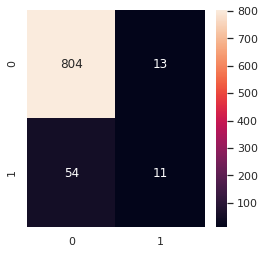

In [158]:
from sklearn.metrics import confusion_matrix


print(confusion_matrix(y_test, y_predict_class))


plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_predict_class), annot=True, fmt="d")

(array([[  0.,   6.,  17.,   6.,   0., 103.,  24., 726.],
        [726.,  24., 103.,   0.,   6.,  17.,   6.,   0.]]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 <a list of 2 BarContainer objects>)

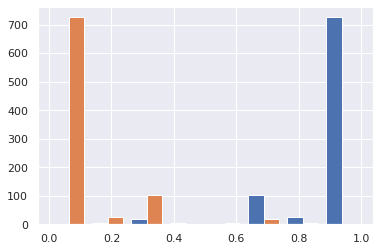

In [119]:
y_predict_prob = forest_clf.predict_proba(X_test)

plt.hist(y_predict_prob, bins=8)


In [122]:
cross_val_score(forest_clf, X_test, y_test, cv=10, scoring='roc_auc').mean()


0.8312346754419926

In [159]:
fred = pd.DataFrame({'feature':X_train.columns, 'importance':treeClassifier.feature_importances_}).sort_values(['importance'],ascending=False)
fred


,feature,importance
3,Rating.Readmission_Above,0.396786
6,Rating.Experience_Above,0.190474
0,Rating.Mortality_Above,0.182487
25,Procedure.Pneumonia.Quality_Better,0.135620
1,Rating.Mortality_Below,0.035159
21,Procedure.Pneumonia.Value_Average,0.024694
7,Rating.Experience_Below,0.017463
11,Rating.Effectiveness_Same,0.017317
16,Procedure.Heart Failure.Quality_Better,0.000000
24,Procedure.Pneumonia.Quality_Average,0.000000


In [39]:
print(np.unique(y_train))
X_train.columns
#X

[0 1]


Index(['Rating.Mortality_Above', 'Rating.Mortality_Below',
       'Rating.Mortality_Same', 'Rating.Readmission_Above',
       'Rating.Readmission_Below', 'Rating.Readmission_Same',
       'Rating.Experience_Above', 'Rating.Experience_Below',
       'Rating.Experience_Same', 'Rating.Effectiveness_Above',
       'Rating.Effectiveness_Below', 'Rating.Effectiveness_Same',
       'Rating.Timeliness_Above', 'Rating.Timeliness_Below',
       'Rating.Timeliness_Same', 'Procedure.Heart Failure.Quality_Average',
       'Procedure.Heart Failure.Quality_Better',
       'Procedure.Heart Failure.Quality_Worse',
       'Procedure.Heart Failure.Value_Average',
       'Procedure.Heart Failure.Value_Higher',
       'Procedure.Heart Failure.Value_Lower',
       'Procedure.Pneumonia.Value_Average', 'Procedure.Pneumonia.Value_Higher',
       'Procedure.Pneumonia.Value_Lower',
       'Procedure.Pneumonia.Quality_Average',
       'Procedure.Pneumonia.Quality_Better',
       'Procedure.Pneumonia.Quality_Worse

In [82]:
from  io import StringIO
import graphviz
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

featureNames = X_train.columns

dot_data=tree.export_graphviz(treeClassifier,                         
                         out_file=None, 
                         feature_names=featureNames, 
                         class_names= np.unique(y_train), 
                         filled=True, rounded=True,  
                         special_characters=True,
                         rotate=False)  

graph = graphviz.Source(dot_data)  
#graph 

graph.view()


'Source.gv.pdf'

In [63]:

df_numAttrib = pd.DataFrame()

df_numAttrib = df.copy()

rating1 = {'Above': 3, 'Same': 2, 'Below': 1}
df_numAttrib['Rating.Mortality'] = df_numAttrib['Rating.Mortality'].map(rating1)
df_numAttrib['Rating.Readmission'] = df_numAttrib['Rating.Readmission'].map(rating1)
df_numAttrib['Rating.Experience'] = df_numAttrib['Rating.Experience'].map(rating1)
df_numAttrib['Rating.Effectiveness'] = df_numAttrib['Rating.Effectiveness'].map(rating1)
df_numAttrib['Rating.Timeliness'] = df_numAttrib['Rating.Timeliness'].map(rating1)

rating2 = {'Better': 3, 'Average': 2, 'Worse': 1}
df_numAttrib['Procedure.Heart Failure.Quality'] = df_numAttrib['Procedure.Heart Failure.Quality'].map(rating2)
df_numAttrib['Procedure.Pneumonia.Quality'] = df_numAttrib['Procedure.Pneumonia.Quality'].map(rating2)


rating3 = {'Higher': 3, 'Average': 2, 'Lower': 1}
df_numAttrib['Procedure.Heart Failure.Value'] = df_numAttrib['Procedure.Heart Failure.Value'].map(rating3)
df_numAttrib['Procedure.Pneumonia.Value'] = df_numAttrib['Procedure.Pneumonia.Value'].map(rating3)


In [65]:
df_numAttrib[categorical_features].head(10)

,Rating.Mortality,Rating.Readmission,Rating.Experience,Rating.Effectiveness,Rating.Timeliness,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Value,Procedure.Pneumonia.Quality
0,1,1,1,2,3,2,2,2,2
1,1,1,2,3,3,1,2,1,1
2,1,3,1,2,3,2,2,2,2
3,2,1,1,1,3,2,1,1,1
5,2,1,1,1,1,2,2,2,2
6,1,1,1,2,3,2,2,2,1
7,2,3,1,2,2,2,3,3,2
9,2,1,2,2,3,2,2,2,2
10,2,2,3,2,3,2,2,2,2
11,2,3,3,2,2,2,2,1,2


In [67]:
result_scores2 = get_information_gain(df_numAttrib, categorical_features,'IsFiveStars')
print(result_scores2.shape)
result_scores2

(9, 4)


,target_attribute,entropy_target,entropy_attr,ig_score
1,"(IsFiveStars,Rating.Readmission)",0.387572,0.331078,0.056495
2,"(IsFiveStars,Rating.Experience)",0.387572,0.336546,0.051026
0,"(IsFiveStars,Rating.Mortality)",0.387572,0.362911,0.024661
8,"(IsFiveStars,Procedure.Pneumonia.Quality)",0.387572,0.368436,0.019136
5,"(IsFiveStars,Procedure.Heart Failure.Quality)",0.387572,0.377855,0.009717
3,"(IsFiveStars,Rating.Effectiveness)",0.387572,0.382687,0.004885
4,"(IsFiveStars,Rating.Timeliness)",0.387572,0.383256,0.004316
7,"(IsFiveStars,Procedure.Pneumonia.Value)",0.387572,0.386299,0.001274
6,"(IsFiveStars,Procedure.Heart Failure.Value)",0.387572,0.387313,0.000259


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

y2 = df_numAttrib["IsFiveStars"]
X2 = df_numAttrib[categorical_features]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=3)


print(X_train2.shape)
print(X_test2.shape)


treeClassifier2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
treeClassifier2

treeClassifier2.fit(X_train2,y_train2)

predTree2 = treeClassifier2.predict(X_test2)

#print (predTree [0:5])
#print (y_test [0:5])

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test2, predTree2))

(2056, 9)
(882, 9)
DecisionTrees's Accuracy:  0.9297052154195011


In [80]:
print(np.unique(y_train2))
X_train2.columns
#X2

['no' 'yes']


Index(['Rating.Mortality', 'Rating.Readmission', 'Rating.Experience',
       'Rating.Effectiveness', 'Rating.Timeliness',
       'Procedure.Heart Failure.Quality', 'Procedure.Heart Failure.Value',
       'Procedure.Pneumonia.Value', 'Procedure.Pneumonia.Quality'],
      dtype='object')

In [81]:
from  io import StringIO
import graphviz
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

featureNames = X_train2.columns

dot_data=tree.export_graphviz(treeClassifier2,                         
                         out_file=None, 
                         feature_names=featureNames, 
                         class_names= np.unique(y_train2), 
                         filled=True, rounded=True,  
                         special_characters=True,
                         rotate=False)  

graph = graphviz.Source(dot_data)  
#graph 

graph.view()

'Source.gv.pdf'

In [86]:
df_numAttrib['IsFiveStarsNumeric'] = df_numAttrib['Rating.Overall'].apply(lambda x:1 if x == 5 else 0)

<AxesSubplot:>

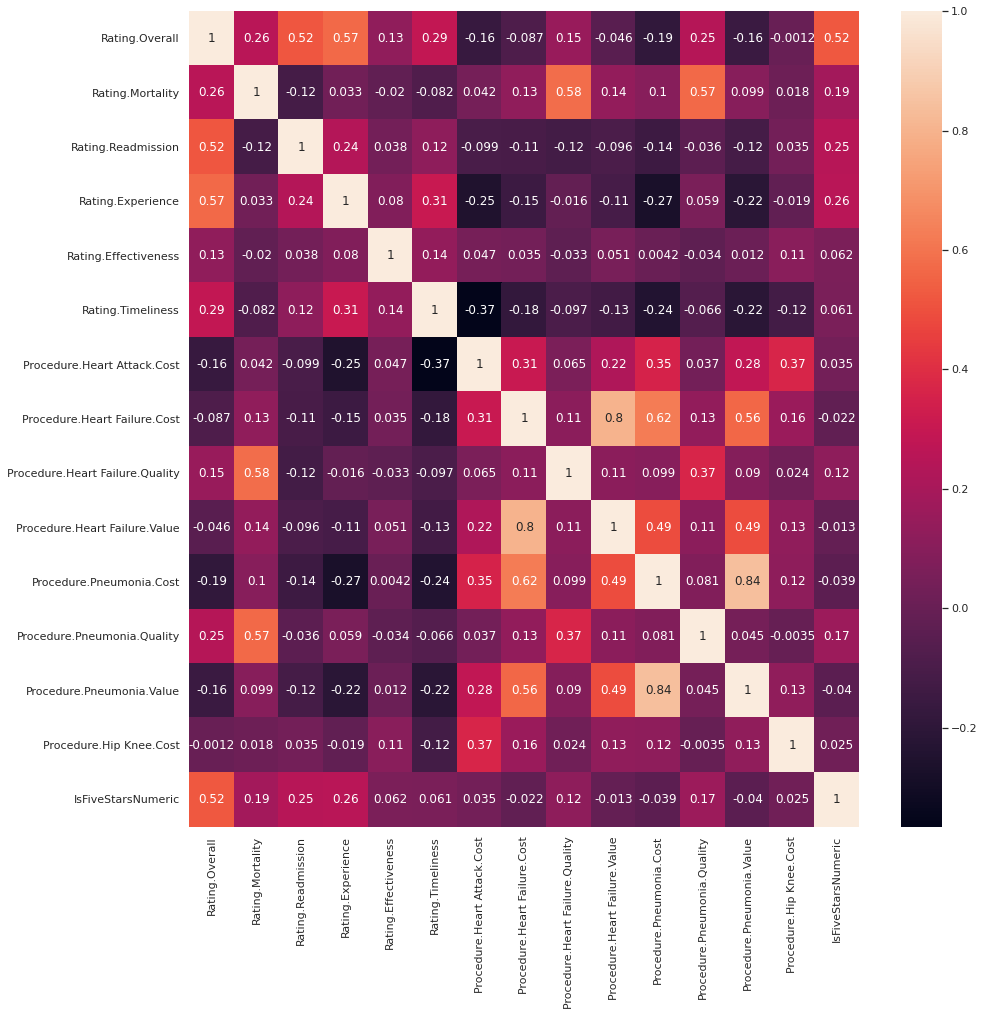

In [87]:
import seaborn as sns
sns.set()

plt.subplots(figsize=(15,15))
sns.heatmap(df_numAttrib.corr(), annot=True)

<AxesSubplot:>

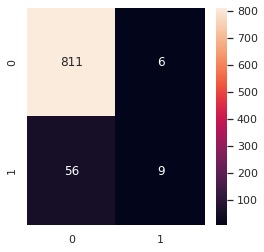

In [161]:
from sklearn.metrics import confusion_matrix
plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test2, treeClassifier2.predict(X_test2)), annot=True, fmt="d")